In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')

In [2]:
df_train = pd.read_csv('./movies_train.csv')
df_test = pd.read_csv('./movies_test.csv')

In [3]:
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
df_train.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

title 제목  
distributor 배급사  
genre 장르  
release_time 개봉일  
time 상영시간 ( 분 )  
screening_rat 상영등급  
director 감독명  
dir_prev_bfnum 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)  
dir_prev_num 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)  
num_staff 스텝 수  
num_actor 주연배우 수  
box_off_num 관객수  

In [5]:
df_train['director'].value_counts()

홍상수           7
장률            4
신재호           4
우민호           4
노진수           4
             ..
권오광           1
한윤선           1
박찬경           1
New Pistol    1
백운학           1
Name: director, Length: 472, dtype: int64

In [6]:
DirectorRating = pd.DataFrame(df_train['director'].value_counts().keys(),columns=['name'])
DirectorRating

,name
0,홍상수
1,장률
2,신재호
3,우민호
4,노진수
...,...
467,권오광
468,한윤선
469,박찬경
470,New Pistol


In [7]:
Directors = df_train['director'].value_counts().keys()
for Director in Directors:
	DirectorRating.loc[ df_train['director'] == Director , 'Watcher_mean'] = np.median(df_train[ df_train['director'] == Director ]['box_off_num'])
	DirectorRating.loc[ df_train['director'] == Director , 'Time_mean'] = int(df_train[ df_train['director'] == Director ]['time'].mean())
	DirectorRating.loc[ df_train['director'] == Director , 'Staff_mean'] = int(df_train[ df_train['director'] == Director ]['num_staff'].mean())
	DirectorRating.loc[ df_train['director'] == Director , 'Actor_mean'] = int(df_train[ df_train['director'] == Director ]['num_actor'].mean())
DirectorRating.head()


,name,Watcher_mean,Time_mean,Staff_mean,Actor_mean
0,홍상수,23398.0,96.0,91.0,2.0
1,장률,1697869.5,134.0,357.0,4.0
2,신재호,6959083.0,123.0,343.0,4.0
3,우민호,217866.0,101.0,20.0,6.0
4,노진수,483387.0,108.0,251.0,2.0


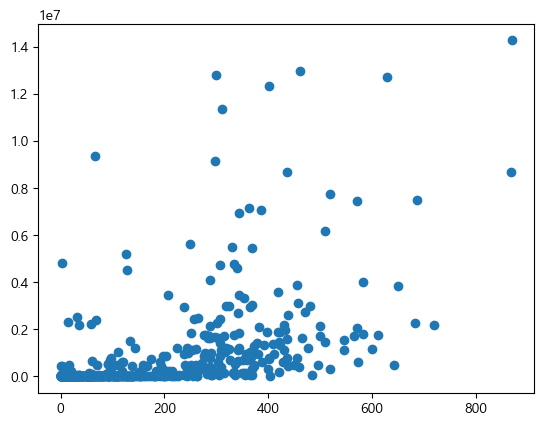

In [8]:
plt.scatter(df_train['num_staff'], df_train['box_off_num'])
plt.show()

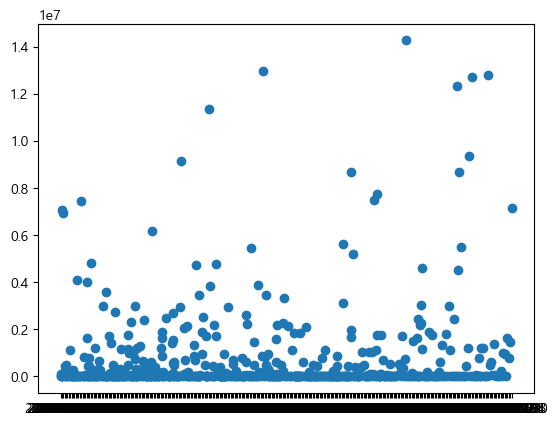

In [9]:
plt.scatter(df_train['release_time'], df_train['box_off_num'])
plt.show()

In [10]:
DirectorRating.sort_values(by='Watcher_mean', ascending=False)

,name,Watcher_mean,Time_mean,Staff_mean,Actor_mean
372,신춘수,14262766.0,126.0,869.0,4.0
362,정범식,12845252.0,137.0,545.0,6.0
122,김선아,11374879.0,127.0,311.0,5.0
101,박은형,9135806.0,139.0,298.0,6.0
322,고석진,8212959.5,127.0,694.0,2.0
...,...,...,...,...,...
177,윤준형,42.0,94.0,55.0,2.0
410,민두식,10.0,71.0,0.0,3.0
338,린슈유,8.0,78.0,27.0,3.0
324,김동명,2.0,92.0,3.0,4.0


In [11]:
df_train.sort_values(by='box_off_num', ascending=False)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,NaN,0,869,4,14262766
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5.169479e+06,4,628,3,12706663
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1.552541e+06,2,402,3,12323595
...,...,...,...,...,...,...,...,...,...,...,...,...
481,려수,(주) 영화사조제,드라마,2011-11-10,98,15세 관람가,진광교,NaN,0,1,2,36
410,전망 좋은 방-밀애,(주) 케이알씨지,멜로/로맨스,2012-11-08,71,청소년 관람불가,이세일,NaN,0,0,3,10
338,타부 : 금지된 사랑,고구마공작소,멜로/로맨스,2015-09-03,78,청소년 관람불가,고구마,1.761531e+07,1,27,3,8
324,청아,인피니티엔터테인먼트,드라마,2014-09-25,92,청소년 관람불가,김정호,NaN,0,3,4,2


In [12]:
df_train['screening_rat'].value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

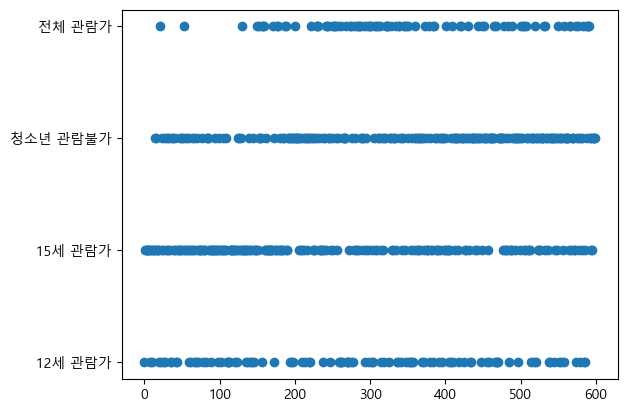

In [13]:
plt.scatter(np.arange(600), df_train.sort_values(by='box_off_num', ascending=False)['screening_rat'])
plt.show()

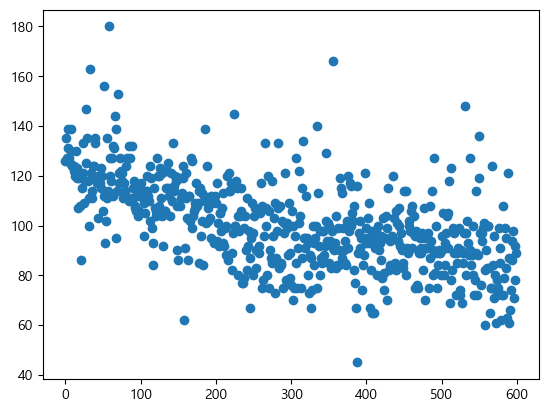

In [14]:
plt.scatter(np.arange(600), df_train.sort_values(by='box_off_num', ascending=False)['time'])
plt.show()

와 드디어 상관관계를 찾았다.  
시청자가 적어지면 상영시간도 적다.  
  
즉, 시청자와 상영시간의 관계는 음의 상관관계다.  

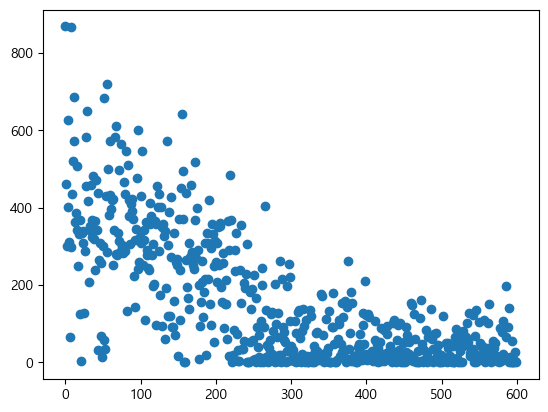

In [15]:
plt.scatter(np.arange(600), df_train.sort_values(by='box_off_num', ascending=False)['num_staff'])
plt.show()

시청자와 스태프 수는 음의 상관관계다

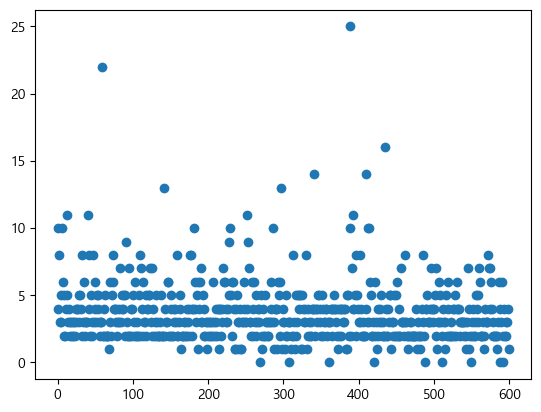

In [16]:
plt.scatter(np.arange(600), df_train.sort_values(by='box_off_num', ascending=False)['num_actor'])
plt.show()

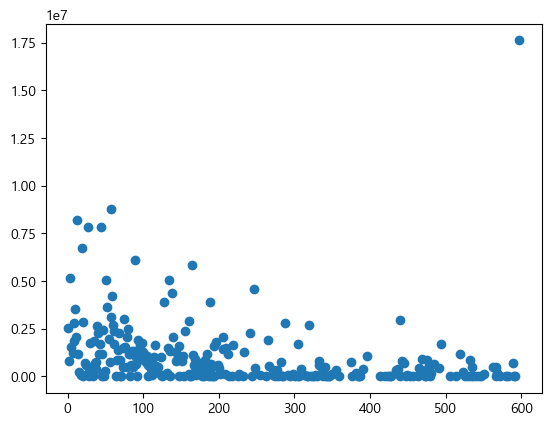

In [17]:
plt.scatter(np.arange(600), df_train.sort_values(by='box_off_num', ascending=False)['dir_prev_bfnum'])
plt.show()

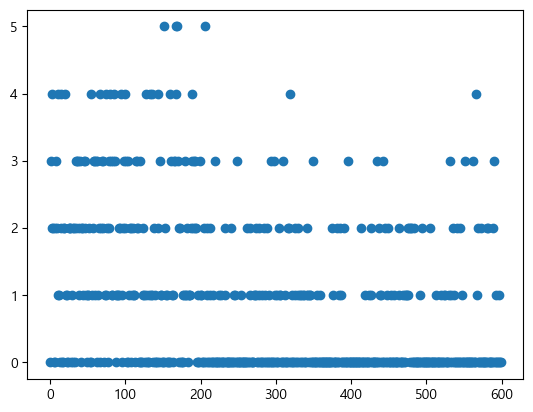

In [18]:
plt.scatter(np.arange(600), df_train.sort_values(by='box_off_num', ascending=False)['dir_prev_num'])
plt.show()

In [19]:
df_train.distributor.value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [20]:
def ShowGraph(Feature : str, From : int, To : int):
	Dict={}
	for i, x in enumerate(df_train.sort_values(by='box_off_num', ascending=False)[Feature]):
		if From-1 <= i and i < To:
			if Dict.get(x) == None:
				Dict[x]=1
			else:
				Dict[x]+=1
	pd.DataFrame({Feature : Dict.keys(), 'val' : Dict.values()}).plot.bar(x=Feature, y='val', rot=0, title=f'{From}~{To}위 까지')
	return Dict

{'CJ 엔터테인먼트': 8, '(주)쇼박스': 5, '(주)NEW': 4, '롯데엔터테인먼트': 2, 'CJ E&M Pictures': 1}

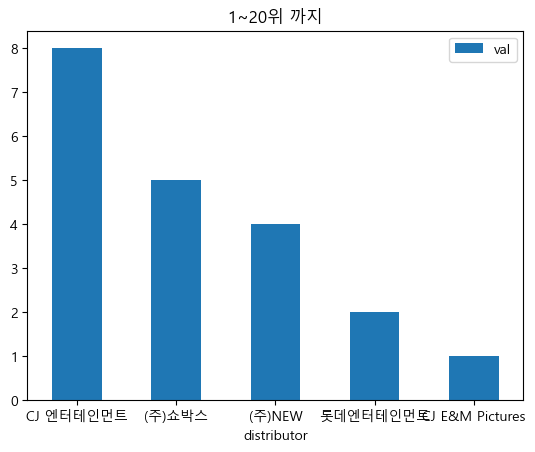

In [21]:
ShowGraph('distributor',1, 20)

{'CJ 엔터테인먼트': 2,
 'CJ E&M 영화부문': 1,
 'CGV아트하우스': 1,
 '쇼박스(주)미디어플렉스': 1,
 '(주)쇼박스': 2,
 '(주)NEW': 1,
 '롯데엔터테인먼트': 3}

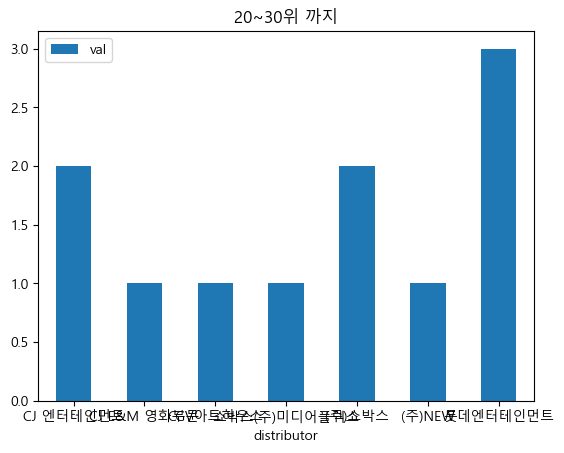

In [22]:
ShowGraph('distributor',20, 30)

{'CJ 엔터테인먼트': 13,
 '(주)쇼박스': 11,
 '(주)NEW': 7,
 '롯데엔터테인먼트': 8,
 'CJ E&M Pictures': 1,
 'CJ E&M 영화부문': 1,
 'CGV아트하우스': 1,
 '쇼박스(주)미디어플렉스': 1,
 '시네마서비스': 1,
 '(주)아이필름코퍼레이션': 1,
 'NEW': 1,
 '인벤트 디': 1,
 '영구아트무비': 1,
 '필라멘트 픽쳐스': 1,
 '이십세기폭스코리아(주)': 1}

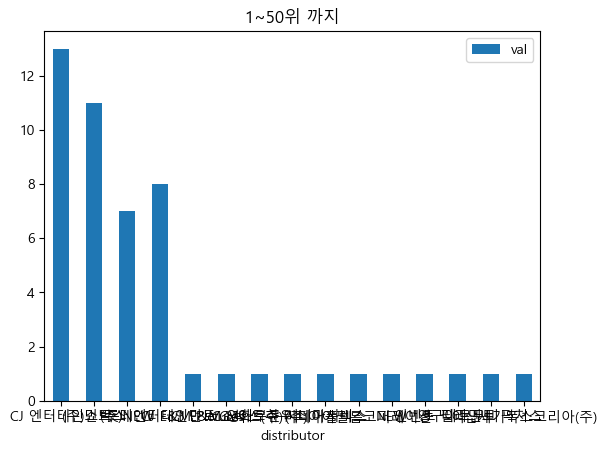

In [23]:
ShowGraph('distributor',1, 50)

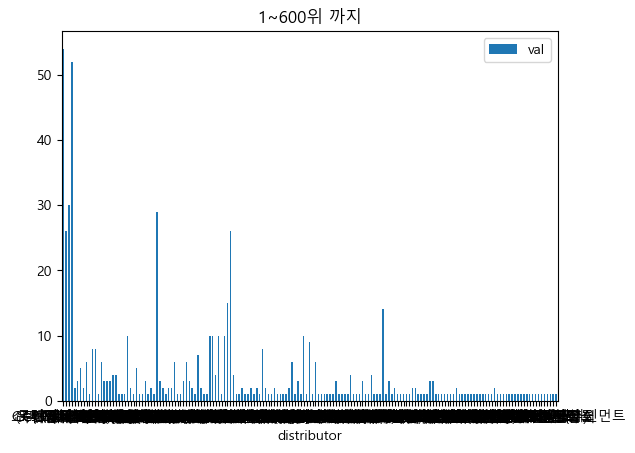

In [24]:
DistributorList = ShowGraph('distributor',1, 600)

In [25]:
sorted(DistributorList.items(), key=lambda x : x[1], reverse=True)

[('CJ 엔터테인먼트', 54),
 ('롯데엔터테인먼트', 52),
 ('(주)NEW', 30),
 ('(주)마운틴픽쳐스', 29),
 ('(주)쇼박스', 26),
 ('인디스토리', 26),
 ('골든타이드픽처스', 15),
 ('(주) 케이알씨지', 14),
 ('시너지', 10),
 ('영화사 진진', 10),
 ('시네마달', 10),
 ('(주) 영화사조제', 10),
 ('어뮤즈', 10),
 ('(주)키노아이', 10),
 ('인디플러그', 9),
 ('NEW', 8),
 ('인벤트 디', 8),
 ('KT&G 상상마당', 8),
 ('스폰지', 7),
 ('시네마서비스', 6),
 ('필라멘트 픽쳐스', 6),
 ('무비꼴라쥬', 6),
 ('BoXoo 엔터테인먼트', 6),
 ('시네마 달', 6),
 ('(주)팝엔터테인먼트', 6),
 ('CGV아트하우스', 5),
 ('리틀빅픽처스', 5),
 ('메가박스(주)플러스엠', 4),
 ('씨너스엔터테인먼트(주)', 4),
 ('나이너스엔터테인먼트(주)', 4),
 ('(주)엣나인필름', 4),
 ('마노엔터테인먼트', 4),
 ('홀리가든', 4),
 ('CJ E&M 영화부문', 3),
 ('이십세기폭스코리아(주)', 3),
 ('싸이더스', 3),
 ('씨네그루(주)키다리이엔티', 3),
 ('KT', 3),
 ('(주)마인스 엔터테인먼트', 3),
 ('타임스토리그룹', 3),
 ('(주) 영화제작전원사', 3),
 ('김기덕 필름', 3),
 ('(주) 브릿지웍스', 3),
 ('트리필름', 3),
 ('드림팩트 엔터테인먼트', 3),
 ('마운틴 픽처스', 3),
 ('이모션 픽처스', 3),
 ('CJ E&M Pictures', 2),
 ('쇼박스(주)미디어플렉스', 2),
 ('CGV 아트하우스', 2),
 ('리틀빅픽쳐스', 2),
 ('(주)리틀빅픽처스', 2),
 ('(주)프레인글로벌', 2),
 ('화앤담이엔티', 2),
 ('SBS콘텐츠허브', 2),
 ('백두대간', 2)

아하  
'CJ 엔터테인먼트', '(주)쇼박스', '(주)NEW', '롯데엔터테인먼트'  
"그저 명작 그 자체" 구나!  
  
[('CJ 엔터테인먼트', 54),  
 ('롯데엔터테인먼트', 52),  
 ('(주)NEW', 30),  
 ('(주)마운틴픽쳐스', 29),  
 ('(주)쇼박스', 26),  
 ('인디스토리', 26),  
아 이 곳들이 많이 만드는구나   

{'드라마': 2, '느와르': 1, '코미디': 1, '액션': 1}

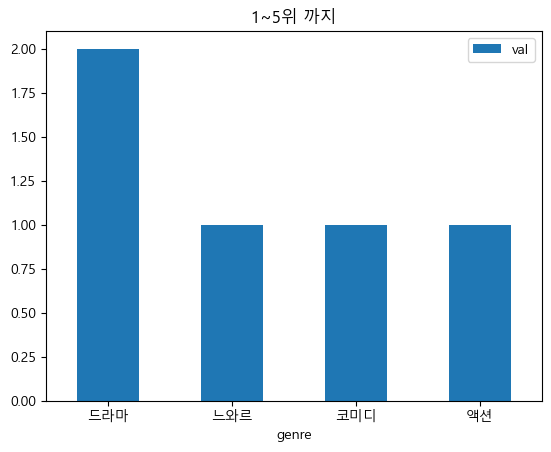

In [26]:
ShowGraph('genre',1, 5)

{'드라마': 5, '느와르': 3, '코미디': 3, '액션': 5, 'SF': 2, '공포': 1, '미스터리': 1}

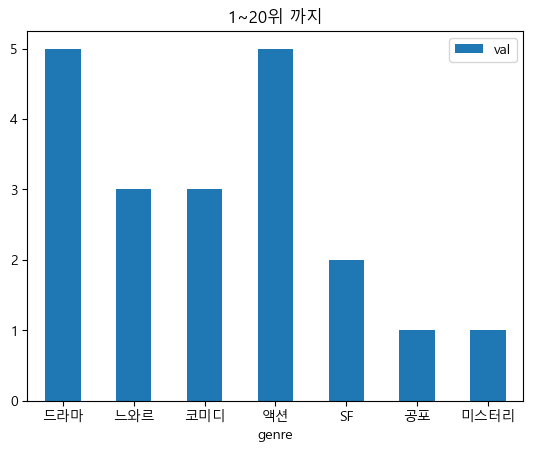

In [27]:
ShowGraph('genre',1, 20)

{'드라마': 15,
 '느와르': 8,
 '코미디': 9,
 '액션': 7,
 'SF': 2,
 '공포': 2,
 '미스터리': 2,
 '다큐멘터리': 1,
 '멜로/로맨스': 4}

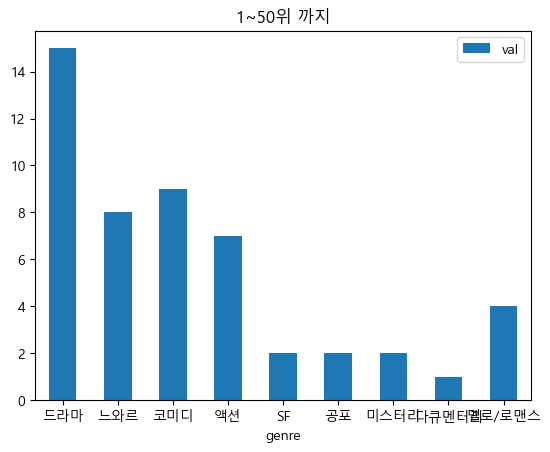

In [28]:
ShowGraph('genre',1, 50)

{'드라마': 32,
 '느와르': 17,
 '코미디': 12,
 '액션': 14,
 'SF': 4,
 '공포': 6,
 '미스터리': 2,
 '다큐멘터리': 1,
 '멜로/로맨스': 11,
 '애니메이션': 1}

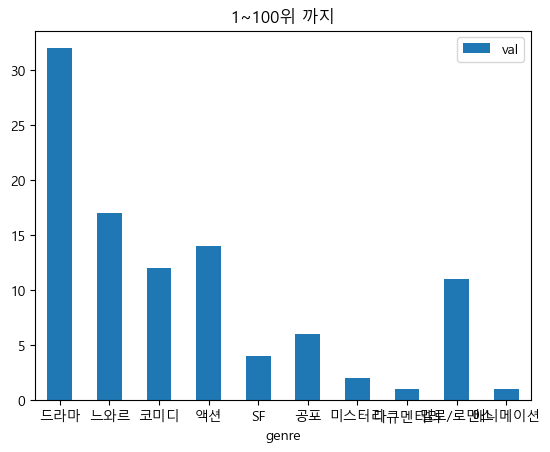

In [29]:
ShowGraph('genre',1, 100)

아하 드라마 > 느와르 > 액션 > 코미디 순이구나  
  
하지만 드라마 : 1등인 점은 확실하나, 2~4등은 애매  
느와르 == 코미디 == 액션 비슷비슷  

{'12세 관람가': 3, '15세 관람가': 15, '청소년 관람불가': 2}

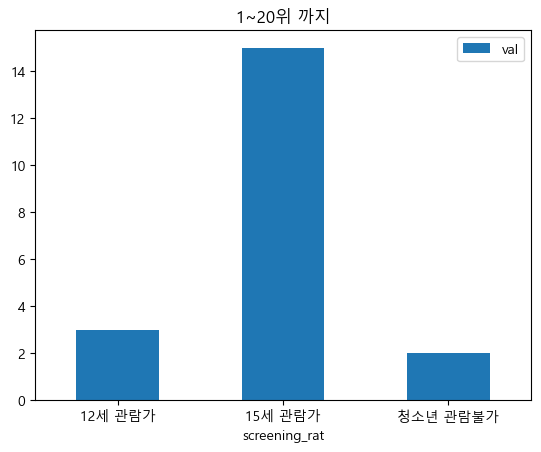

In [30]:
ShowGraph('screening_rat',1, 20)

{'12세 관람가': 11, '15세 관람가': 28, '청소년 관람불가': 10, '전체 관람가': 1}

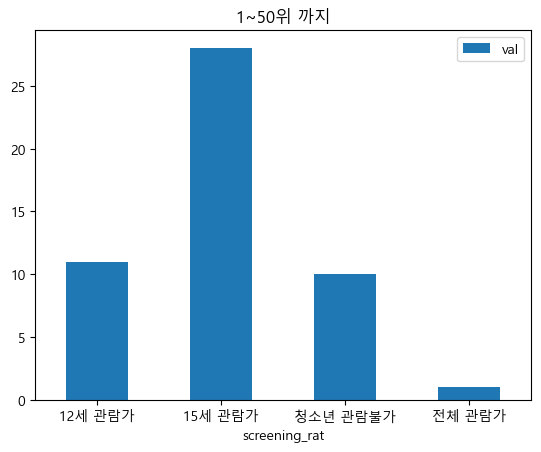

In [31]:
ShowGraph('screening_rat',1, 50)

{'12세 관람가': 20, '15세 관람가': 55, '청소년 관람불가': 23, '전체 관람가': 2}

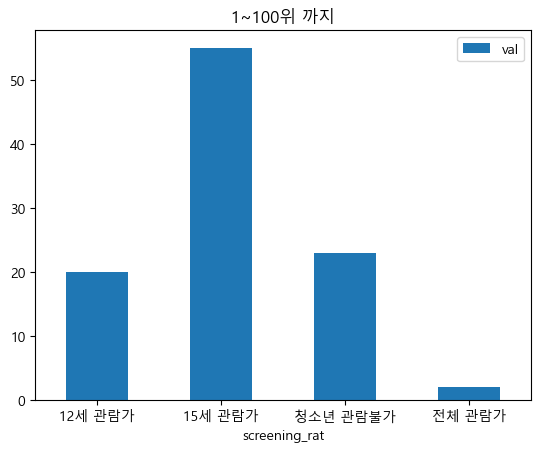

In [32]:
ShowGraph('screening_rat',1, 100)

15세 관람가 > 12세 관람가 == 청소년 관람불가 > 전체 관람가  
아하 15세 관람가가 명작이구나  
전체 관람가는 적구나  

In [33]:
# df_train.loc[ df_train['screening_rat'] == '전체 관람가' , 'screening_rat'] = 0
# df_train.loc[ df_train['screening_rat'] == '12세 관람가' , 'screening_rat'] = 1
# df_train.loc[ df_train['screening_rat'] == '15세 관람가' , 'screening_rat'] = 2
# df_train.loc[ df_train['screening_rat'] == '청소년 관람불가' , 'screening_rat'] = 3

{'윤제균': 1,
 '최동훈': 2,
 '이환경': 1,
 '추창민': 1,
 '양우석': 1,
 '봉준호': 1,
 '한재림': 1,
 '이석훈': 2,
 '황동혁': 1,
 '김한민': 1,
 '강형철': 1,
 '류승완': 1,
 '우민호': 1,
 '장철수': 1,
 '이정범': 1,
 '허정': 1,
 '조의석': 1,
 '장재현': 1}

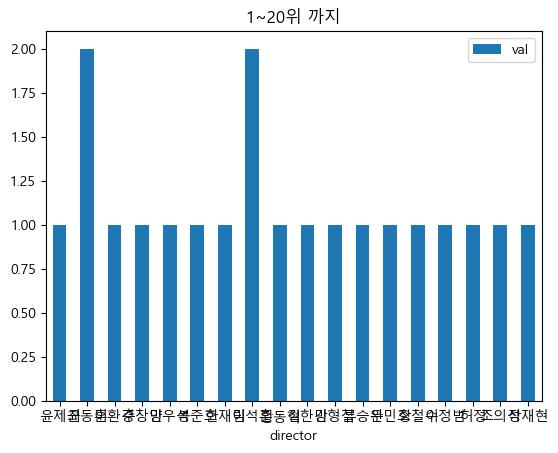

In [34]:
ShowGraph('director',1, 20)

명작은 그냥 골고루 만드는구나

근데 설마 제목의 길이도 영향을 끼칠까?

In [35]:
def ShowLen(From : int, To : int):
	Dict={}
	for i, x in enumerate(df_train.sort_values(by='box_off_num', ascending=False)['title']):
		x = len(x.replace(' ',''))
		if From-1 <= i and i < To:
			if Dict.get(x) == None:
				Dict[x]=1
			else:
				Dict[x]+=1
	print(Dict)
	pd.DataFrame({'title' : Dict.keys(), 'val' : Dict.values()}).plot.bar(x='title', y='val', rot=0, title=f'{From}~{To}위 까지')

{4: 6, 3: 4, 6: 1, 2: 3, 8: 2, 9: 1, 5: 3}


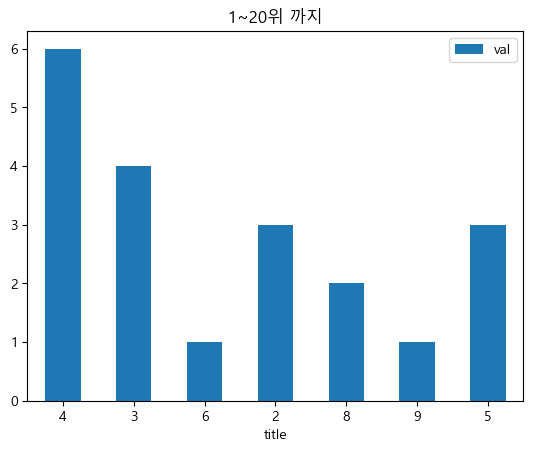

In [36]:
ShowLen(1, 20)

{4: 16, 3: 24, 6: 11, 2: 15, 8: 5, 9: 3, 5: 15, 11: 1, 14: 1, 15: 1, 7: 5, 12: 1, 10: 2}


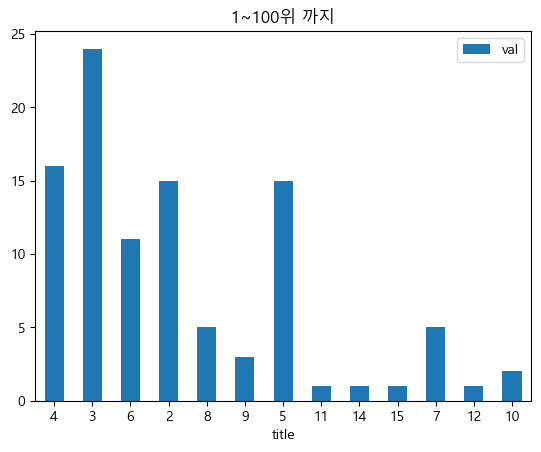

In [37]:
ShowLen(1, 100)

음..ㅋㅋ 스페이스 바 제외 3글자가 많구나  
4, 2, 5 는 거기서 거기  
이게 관련이 있을 줄 몰랐네  

혹시 명작 대량생산 년도가 있을까?

In [38]:
def ShowYear(From : int, To : int):
	Dict={}
	for i, x in enumerate(df_train.sort_values(by='box_off_num', ascending=False)['release_time']):
		x = x.split('-')[0]
		if From-1 <= i and i < To:
			if Dict.get(x) == None:
				Dict[x]=1
			else:
				Dict[x]+=1
	print(Dict)
	pd.DataFrame({'release_time' : Dict.keys(), 'val' : Dict.values()}).plot.bar(x='release_time', y='val', rot=0, title=f'{From}~{To}위 까지')

{'2014': 3, '2012': 2, '2013': 8, '2015': 4, '2011': 2, '2010': 1}


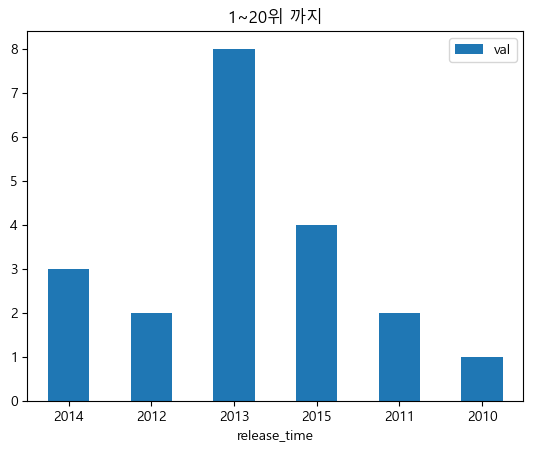

In [39]:
ShowYear(1, 20)

{'2014': 8, '2012': 12, '2013': 10, '2015': 7, '2011': 6, '2010': 7}


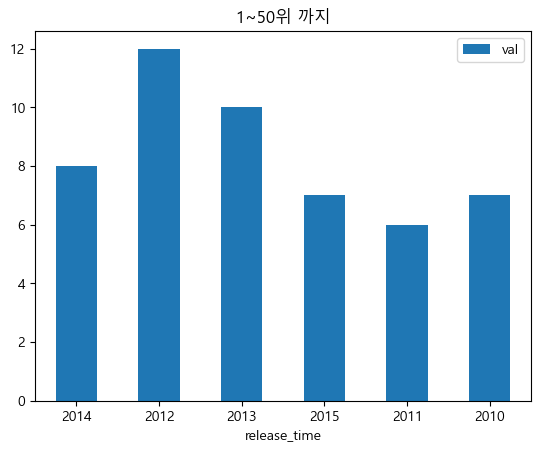

In [40]:
ShowYear(1, 50)

{'2014': 127, '2012': 88, '2013': 95, '2015': 120, '2011': 80, '2010': 90}


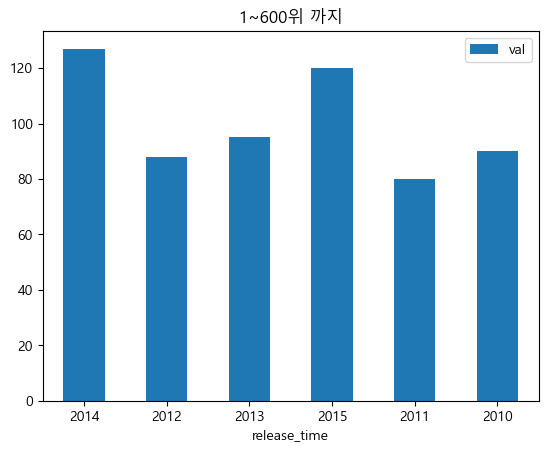

In [41]:
ShowYear(1, 600)

년도는 크게? 상관 없는 듯

{4: 19, 10: 2, 8: 5, 3: 25, 5: 13, 6: 5, 2: 24, 11: 2, 22: 1, 1: 1, 7: 2, 9: 1}

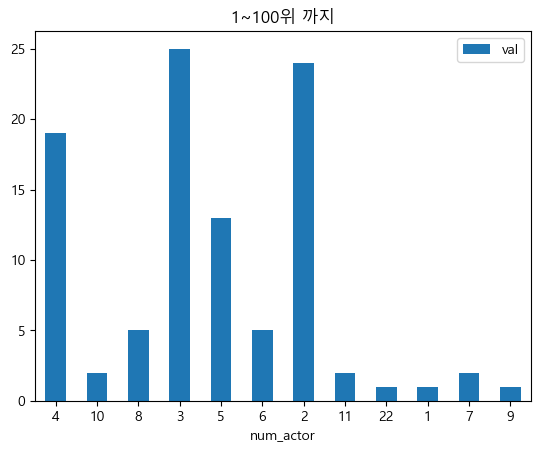

In [42]:
ShowGraph('num_actor',1, 100)

주연이 몇 명인지도 좀 중요하구나

{869: 1,
 462: 1,
 300: 1,
 628: 1,
 402: 1,
 311: 1,
 67: 1,
 298: 2,
 868: 1,
 437: 2,
 520: 1,
 687: 1,
 572: 2,
 363: 1,
 387: 1,
 343: 3,
 509: 1,
 249: 1,
 331: 1,
 369: 2,
 126: 1,
 3: 1,
 335: 2,
 308: 2,
 340: 1,
 128: 1,
 288: 2,
 583: 1,
 456: 1,
 650: 1,
 418: 1,
 207: 1,
 353: 1,
 458: 1,
 324: 2,
 481: 1,
 319: 1,
 365: 1,
 238: 1,
 471: 1,
 342: 1,
 438: 1,
 31: 1,
 264: 1,
 257: 1,
 68: 1,
 14: 1,
 302: 1,
 683: 1,
 59: 1,
 36: 1,
 431: 1,
 719: 1,
 287: 1,
 500: 1,
 382: 1,
 433: 1,
 397: 1,
 419: 1,
 423: 1,
 252: 1,
 582: 1,
 281: 1,
 612: 1,
 277: 1,
 315: 1,
 499: 1,
 286: 1,
 566: 1,
 304: 1,
 284: 1,
 466: 1,
 546: 1,
 134: 1,
 510: 1,
 420: 1,
 379: 1,
 307: 1,
 410: 1,
 391: 1,
 422: 1,
 372: 1,
 224: 1,
 318: 1,
 143: 1,
 344: 1,
 477: 1,
 243: 1,
 600: 1,
 261: 1}

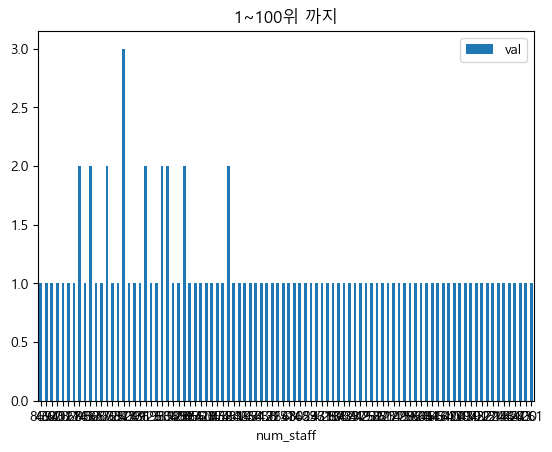

In [43]:
ShowGraph('num_staff', 1, 100)

스태프는 잘 모르겠소 범위로 알아보자

In [44]:
for i in range(0, df_train['num_staff'].max()+100, 100):
	df_train.loc[ (df_train['num_staff'] >= i) & (df_train['num_staff'] < i+100) , 'num_staff'] = i

In [45]:
df_train.num_staff.value_counts()

0      324
100     83
300     68
200     68
400     34
500     13
600      7
800      2
700      1
Name: num_staff, dtype: int64

{800: 2, 400: 20, 300: 32, 600: 6, 0: 7, 200: 18, 500: 10, 100: 4, 700: 1}

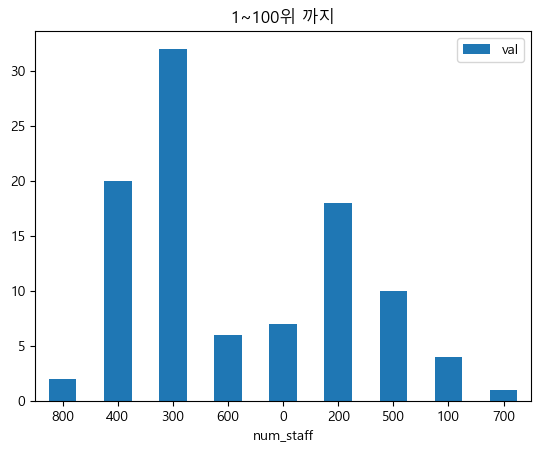

In [46]:
ShowGraph('num_staff', 1, 100)

300명대가 되게 많구나!

{0: 6, 3: 2, 2: 7, 4: 3, 1: 2}

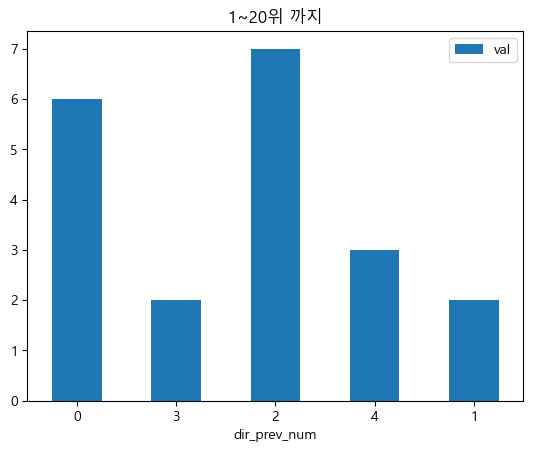

In [47]:
ShowGraph('dir_prev_num', 1, 20)

{0: 54, 3: 34, 2: 44, 4: 18, 1: 47, 5: 3}

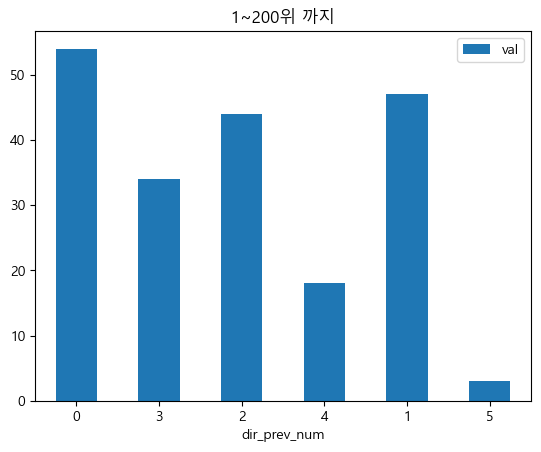

In [48]:
ShowGraph('dir_prev_num', 1, 200)

dir_prev_num 중요하당

In [49]:
df_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [50]:
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,0,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,300,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,300,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,0,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,200,2,483387


명작 중요도  
screening_rat, genre, distributor, num_staff, time, len(title), release_time(year)  

Feature Engineering 의 Binning  
Feature scaling 써야겠다  

In [51]:
MaxValue = df_train['num_staff'].max() if df_train['num_staff'].max() > df_test['num_staff'].max() else df_test['num_staff'].max()
for i in range(0, MaxValue.max()+100, 100):
	df_train.loc[ (df_train['num_staff'] >= i) & (df_train['num_staff'] < i+100) , 'num_staff'] = 0 if i == 0 else int(i/100)
	df_test.loc[ (df_test['num_staff'] >= i) & (df_test['num_staff'] < i+100) , 'num_staff'] = 0 if i == 0 else int(i/100)

In [52]:
df_train.num_staff.value_counts()

0    324
1     83
3     68
2     68
4     34
5     13
6      7
8      2
7      1
Name: num_staff, dtype: int64

num_staff 끝

In [53]:
df_train.screening_rat.value_counts()

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [54]:
df_train.screening_rat = df_train.screening_rat.map({'청소년 관람불가' : 0, '15세 관람가' : 1, '12세 관람가' : 2, '전체 관람가' : 3})
df_test.screening_rat = df_test.screening_rat.map({'청소년 관람불가' : 0, '15세 관람가' : 1, '12세 관람가' : 2, '전체 관람가' : 3})

In [55]:
df_train.screening_rat.value_counts()

0    204
1    202
2    102
3     92
Name: screening_rat, dtype: int64

screening_rat 끝

In [56]:
MyDict = dict(df_train.genre.value_counts())
for i,kv in enumerate(MyDict.items()):
	MyDict[kv[0]] = round(i * 0.4, 2)
MyDict

{'드라마': 0.0,
 '다큐멘터리': 0.4,
 '멜로/로맨스': 0.8,
 '코미디': 1.2,
 '공포': 1.6,
 '액션': 2.0,
 '느와르': 2.4,
 '애니메이션': 2.8,
 '미스터리': 3.2,
 'SF': 3.6,
 '뮤지컬': 4.0,
 '서스펜스': 4.4}

In [57]:
df_train.genre = df_train.genre.map(MyDict)
df_test.genre = df_test.genre.map(MyDict)

In [58]:
df_train.genre.value_counts()

0.0    221
0.4     93
0.8     78
1.2     53
1.6     42
2.0     28
2.4     27
2.8     21
3.2     17
3.6     13
4.0      5
4.4      2
Name: genre, dtype: int64

genre 끝

In [59]:
MyDict = {'CJ 엔터테인먼트': 0,  
	'롯데엔터테인먼트': 1,  
	'(주)NEW': 2,  
	'(주)마운틴픽쳐스': 3,  
	'(주)쇼박스': 4,
	'인디스토리' : 5}
df_train.distributor = df_train.distributor.map(lambda x : 6 if MyDict.get(x) == None else MyDict[x])
df_test.distributor = df_test.distributor.map(lambda x : 6 if MyDict.get(x) == None else MyDict[x])

In [60]:
df_train.distributor.value_counts()

6    383
0     54
1     52
2     30
3     29
4     26
5     26
Name: distributor, dtype: int64

distributor 끝  
num_staff, time, len(title), release_time(year) 남음

In [61]:
df_test.num_staff.max()

7

In [62]:
df_train.num_staff.max()

8

In [63]:
df_train.num_staff = df_train.num_staff.map(lambda x : round(x*0.3, 2))
df_test.num_staff = df_test.num_staff.map(lambda x : round(x*0.3, 2))

In [64]:
df_train.num_staff.value_counts()

0.0    324
0.3     83
0.9     68
0.6     68
1.2     34
1.5     13
1.8      7
2.4      2
2.1      1
Name: num_staff, dtype: int64

num_staff 끝  
time, len(title), release_time(year)

In [65]:
MaxValue = df_train['time'].max() if df_train['time'].max() > df_test['time'].max() else df_test['time'].max()
for i in range(0, MaxValue.max()+20, 20):
	df_train.loc[ (df_train['time'] >= i) & (df_train['time'] < i+20) , 'time'] = 0 if i == 0 else round(int(i/20) * 0.4, 2)
	df_test.loc[ (df_test['time'] >= i) & (df_test['time'] < i+20) , 'time'] = 0 if i == 0 else round(int(i/20) * 0.4, 2)

In [66]:
df_train.time.value_counts()

1.6    232
2.0    209
2.4     83
1.2     65
2.8      7
3.2      2
3.6      1
0.8      1
Name: time, dtype: int64

time 끝  
len(title), release_time(year)

In [67]:
df_train.title = df_train.title.map(lambda x : 0.2 * len(x.replace(' ','')))
df_test.title = df_test.title.map(lambda x : 0.2 * len(x.replace(' ','')))

In [68]:
df_train.title.value_counts()

0.8    107
1.0     84
0.4     75
0.6     75
1.2     75
1.4     59
1.6     31
1.8     21
2.0     14
2.2     13
2.6     12
2.4      9
0.2      6
2.8      6
3.2      4
3.0      3
3.4      3
4.2      1
3.6      1
4.6      1
Name: title, dtype: int64

len(title) 끝  
release_time(year)

In [69]:
df_train.release_time = df_train.release_time.map(lambda x : int(x.split('-')[0]))
df_test.release_time = df_test.release_time.map(lambda x : int(x.split('-')[0]))

In [70]:
df_train.release_time.value_counts()

2014    127
2015    120
2013     95
2010     90
2012     88
2011     80
Name: release_time, dtype: int64

In [71]:
MinValue = df_test.release_time.min() if df_test.release_time.min() < df_train.release_time.min() else df_train.release_time.min()
MaxValue = df_test.release_time.max() if df_test.release_time.max() > df_train.release_time.max() else df_train.release_time.max()
MinValue, MaxValue

(2010, 2015)

In [72]:
MyDict = {}
for Year in range(MinValue , MaxValue + 1):
	MyDict[Year] = round((Year - MinValue) * 0.3, 2)
MyDict

{2010: 0.0, 2011: 0.3, 2012: 0.6, 2013: 0.9, 2014: 1.2, 2015: 1.5}

In [73]:
df_test.release_time = df_test.release_time.map(MyDict)
df_train.release_time = df_train.release_time.map(MyDict)

In [74]:
df_train.release_time.value_counts()

1.2    127
1.5    120
0.9     95
0.0     90
0.6     88
0.3     80
Name: release_time, dtype: int64

release_time(year) 끝

box_off_num scaling 필요

In [75]:
df_train.box_off_num = df_train.box_off_num.map(lambda x : int(x / 10_0000))

In [76]:
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,1.0,1,2.0,0.6,1.6,0,조병옥,NaN,0,0.0,2,0
1,0.8,4,2.4,1.5,2.4,0,우민호,1161602.50,2,0.9,3,70
2,1.6,4,2.0,0.9,2.4,1,장철수,220775.25,4,0.9,4,69
3,1.4,2,1.2,0.6,2.0,3,구자홍,23894.00,2,0.0,6,2
4,0.8,6,1.2,0.0,2.0,1,신근호,1.00,1,0.6,2,4


In [77]:
df_train.drop('director', axis=1, inplace=True)
df_test.drop('director', axis=1, inplace=True)

In [78]:
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,1.0,1,2.0,0.6,1.6,0,NaN,0,0.0,2,0
1,0.8,4,2.4,1.5,2.4,0,1161602.50,2,0.9,3,70
2,1.6,4,2.0,0.9,2.4,1,220775.25,4,0.9,4,69
3,1.4,2,1.2,0.6,2.0,3,23894.00,2,0.0,6,2
4,0.8,6,1.2,0.0,2.0,1,1.00,1,0.6,2,4


In [79]:
df_train.drop('dir_prev_bfnum', axis=1, inplace=True)
df_test.drop('dir_prev_bfnum', axis=1, inplace=True)

In [80]:
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor,box_off_num
0,1.0,1,2.0,0.6,1.6,0,0,0.0,2,0
1,0.8,4,2.4,1.5,2.4,0,2,0.9,3,70
2,1.6,4,2.0,0.9,2.4,1,4,0.9,4,69
3,1.4,2,1.2,0.6,2.0,3,2,0.0,6,2
4,0.8,6,1.2,0.0,2.0,1,1,0.6,2,4


이제 학습할 시간입니다!

In [81]:
DataX = df_train.drop('box_off_num', axis=1)
DataY = df_train['box_off_num']

In [82]:
DataY.value_counts()

0      389
4       20
1       20
2       14
3       11
6       10
7        9
17       8
11       8
5        6
18       6
9        6
12       6
8        6
16       5
10       4
29       4
13       4
21       4
22       4
14       4
15       3
24       3
30       2
34       2
38       2
86       2
74       2
47       2
26       2
20       2
23       2
45       2
41       1
40       1
123      1
35       1
128      1
56       1
55       1
93       1
129      1
127      1
142      1
25       1
54       1
77       1
51       1
19       1
31       1
48       1
33       1
113      1
70       1
91       1
61       1
27       1
69       1
71       1
Name: box_off_num, dtype: int64

In [83]:
DataX.shape, DataY.shape

((600, 9), (600,))

In [84]:
DataX

,title,distributor,genre,release_time,time,screening_rat,dir_prev_num,num_staff,num_actor
0,1.0,1,2.0,0.6,1.6,0,0,0.0,2
1,0.8,4,2.4,1.5,2.4,0,2,0.9,3
2,1.6,4,2.0,0.9,2.4,1,4,0.9,4
3,1.4,2,1.2,0.6,2.0,3,2,0.0,6
4,0.8,6,1.2,0.0,2.0,1,1,0.6,2
...,...,...,...,...,...,...,...,...,...
595,0.4,2,0.0,1.2,2.0,0,1,1.5,7
596,0.8,4,0.0,0.9,2.4,1,1,0.6,6
597,0.8,3,1.6,0.0,1.6,0,0,0.3,4
598,1.0,0,2.4,1.5,2.0,1,0,1.2,4


In [85]:
DataY

0       0
1      70
2      69
3       2
4       4
       ..
595    14
596    17
597     0
598    21
599    71
Name: box_off_num, Length: 600, dtype: int64

In [86]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [120]:
LinearFilter = LinearRegression()
LinearFilter.fit(DataX, DataY)

LinearRegression()

In [121]:
LinearFilter.score(DataX, DataY)

0.3356722427917058

In [130]:
PredictY = LinearFilter.predict(df_test)

In [123]:
OutputTitle = pd.read_csv('./movies_test.csv')
OutputTitle.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [124]:
OutputTitle.drop(['distributor','genre','release_time','time','screening_rat','director','dir_prev_bfnum','dir_prev_num','num_staff','num_actor'], axis=1, inplace=True)

In [125]:
OutputTitle.head()

,title
0,용서는 없다
1,아빠가 여자를 좋아해
2,하모니
3,의형제
4,평행 이론


In [136]:
PredictY = list(PredictY)
PredictY

[18.593776644819027,
 12.399370352186402,
 25.36297499706013,
 21.608873892873522,
 19.46699532080812,
 0.5404021370026477,
 -0.3575729488768964,
 4.029265208220757,
 -3.8243457965123078,
 10.309890435835648,
 10.280670788717401,
 16.551984836196887,
 15.07485680226372,
 -2.1653476242857685,
 18.45903695927957,
 33.74049486116007,
 3.550633289797023,
 18.01322603775546,
 10.414453487257358,
 10.000417036177673,
 -5.222571772978974,
 0.43477806469226365,
 10.338924477389156,
 -3.0827478887699566,
 -1.5065576252682362,
 20.362294545790018,
 -2.0313999411605543,
 23.20246101397326,
 4.701555066603799,
 5.778162753758377,
 17.19885391222875,
 -3.547190782337406,
 5.363593534944805,
 22.652295353439815,
 -1.4051316723674603,
 1.216994591671824,
 0.46123730494087667,
 -0.25002121633057506,
 -1.2004891939354074,
 -6.937511012015935,
 5.534760089261958,
 0.4519261248054711,
 4.7723633482266195,
 1.9792131040838843,
 8.76718429942779,
 23.605482771210465,
 -1.896767829266027,
 6.384518613789378

In [138]:
PredictY = np.array(list(map(lambda x : int(x * 10_0000), PredictY)))

In [141]:
PredictY = np.array(list(map(lambda x : x if x > 0 else 0, PredictY)))
PredictY

array([ 1859377,  1239937,  2536297,  2160887,  1946699,    54040,
              0,   402926,        0,  1030989,  1028067,  1655198,
        1507485,        0,  1845903,  3374049,   355063,  1801322,
        1041445,  1000041,        0,    43477,  1033892,        0,
              0,  2036229,        0,  2320246,   470155,   577816,
        1719885,        0,   536359,  2265229,        0,   121699,
          46123,        0,        0,        0,   553476,    45192,
         477236,   197921,   876718,  2360548,        0,   638451,
         649593,        0,   119691,   961869,   509001,  1174649,
        1098462,   420263,    66411,  1971267,  1868093,  2201102,
        2150790,  2250170,   477872,        0,   463131,        0,
        2041375,   250594,   846678,   476780,  3218679,  1897255,
              0,  1852730,        0,        0,  1799486,   428185,
         848291,        0,   417155,  1666906,        0,  2256538,
              0,  2276632,        0,        0,   120056,   515

In [142]:
Export = pd.DataFrame({
	'title' : OutputTitle['title'],
	'box_off_num' : PredictY,
})
Export.to_csv('result.csv', index=False)

상위 99% 찍었다.. 뭔가 잘못된 게 분명쓰!!  
2,496,823.73166  
처음부터 다시 또 해봐야겠다